**ME21B145 Assignment 1 - Pratham Sunkad** 

Trying to Find Map boundary and sample points using opencv

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

In [21]:
image_path = 'IITM_map_without_background.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

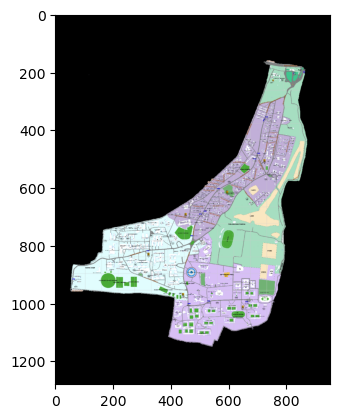

In [22]:
plt.imshow(image)

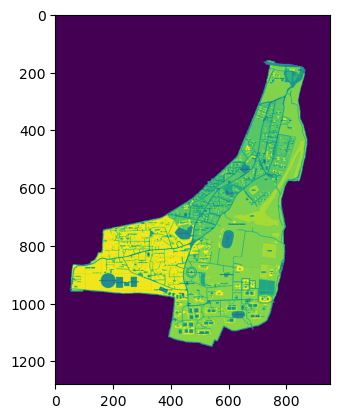

In [23]:
plt.imshow(gray_image)

In [25]:
np.max(gray_image)

255

In [26]:
s = gray_image.shape
for i in range(s[0]):
    for j in range(s[1]):
        if gray_image[i][j] != 0:
            gray_image[i][j] = 255


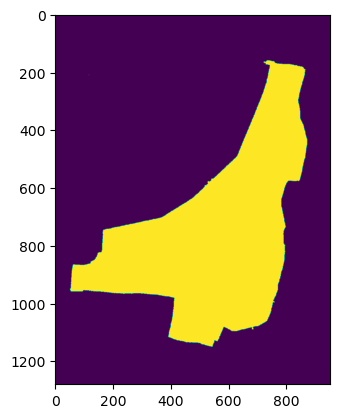

In [27]:
plt.imshow(gray_image)

In [28]:
edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

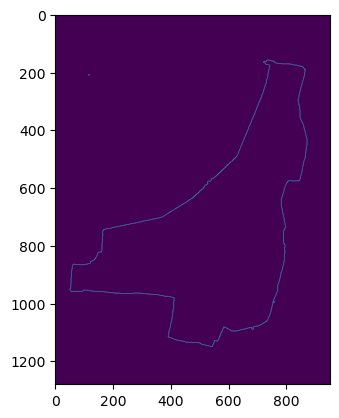

In [29]:
plt.imshow(edges)

In [30]:
output_path = 'IITM_edge_detected_image.png'  # Replace with your desired output path
cv2.imwrite(output_path, edges)

True

In [ ]:
plt.savefig(output_path, format='png', bbox_inches='tight')

This did not work, so selected 88 points on the map on gmsh itself

*Coverting .gmsh file to .vtk file - python code*

In [55]:
def parse_gmsh(file_path):
    with open(file_path, 'r') as file:
        content = file.readlines()
    
    nodes = []
    elements = []

    in_node_section = False
    in_element_section = False

    for line in content:
        line = line.strip()
        if not line:
            continue

        if line.startswith('$Nodes'):
            in_node_section = True
            continue
        elif line.startswith('$EndNodes'):
            in_node_section = False
            continue
        elif line.startswith('$Elements'):
            in_element_section = True
            continue
        elif line.startswith('$EndElements'):
            in_element_section = False
            continue

        if in_node_section:
            parts = line.split()
            if len(parts) == 4:
                node_id = int(parts[0])
                x = float(parts[1])
                y = float(parts[2])
                z = float(parts[3])
                nodes.append((x, y, z))

        if in_element_section:
            parts = line.split()
            if len(parts) > 1:
                element_type = int(parts[1])
                if element_type == 15:  # Point element
                    node_id = int(parts[-1]) - 1  # Convert to 0-index
                    elements.append((1, [node_id]))
                elif element_type == 1:  # Line element
                    node1 = int(parts[-2]) - 1  # Convert to 0-index
                    node2 = int(parts[-1]) - 1  # Convert to 0-index
                    elements.append((2, [node1, node2]))
                elif element_type == 2:  # Triangle element
                    node1 = int(parts[-3]) - 1  # Convert to 0-index
                    node2 = int(parts[-2]) - 1  # Convert to 0-index
                    node3 = int(parts[-1]) - 1  # Convert to 0-index
                    elements.append((3, [node1, node2, node3]))

    return nodes, elements


In [56]:
nodes,elements = parse_gmsh('IITM_Map_gmsh')

In [63]:
def write_vtk(nodes, elements, vtk_file):
    with open(vtk_file, 'w') as vtk:
        vtk.write("# vtk DataFile Version 2.0\n")
        vtk.write("Converted from Gmsh\n")
        vtk.write("ASCII\n")
        vtk.write("DATASET UNSTRUCTURED_GRID\n")
        
        # Write points
        vtk.write(f"POINTS {len(nodes)} double\n")
        for node in nodes:
            vtk.write(f"{node[0]} {node[1]} {node[2]}\n")
        
        # Calculate the total number of entries for CELLS
        cell_entries = 0
        for elem in elements:
            cell_entries += len(elem[1]) + 1  # +1 for the count at the start of each cell

        # Write cells
        vtk.write(f"CELLS {len(elements)} {cell_entries}\n")
        for elem in elements:
            vtk.write(f"{elem[0]} " + " ".join(map(str, elem[1])) + "\n")
        
        # Write cell types
        vtk.write(f"CELL_TYPES {len(elements)}\n")
        for elem in elements:
            if elem[0] == 1:
                vtk.write("1\n")  # Vertex
            elif elem[0] == 2:
                vtk.write("3\n")  # Line
            elif elem[0] == 3:
                vtk.write("5\n")  # Triangle



In [64]:
def gmsh_to_vtk(gmsh_file, vtk_file):
    nodes, elements = parse_gmsh(gmsh_file)
    write_vtk(nodes, elements, vtk_file)
    print(f"Conversion to {vtk_file} completed!")

In [65]:
gmsh_to_vtk('IITM_Map_gmsh', 'IITM_vtk_output1.vtk')

Conversion to IITM_vtk_output1.vtk completed!
